In [4]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [5]:
#setting seed for same result everywhere
torch.manual_seed(42)

In [7]:
df=pd.read_csv("fmnist_small.csv")
df.head()  #784 column


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


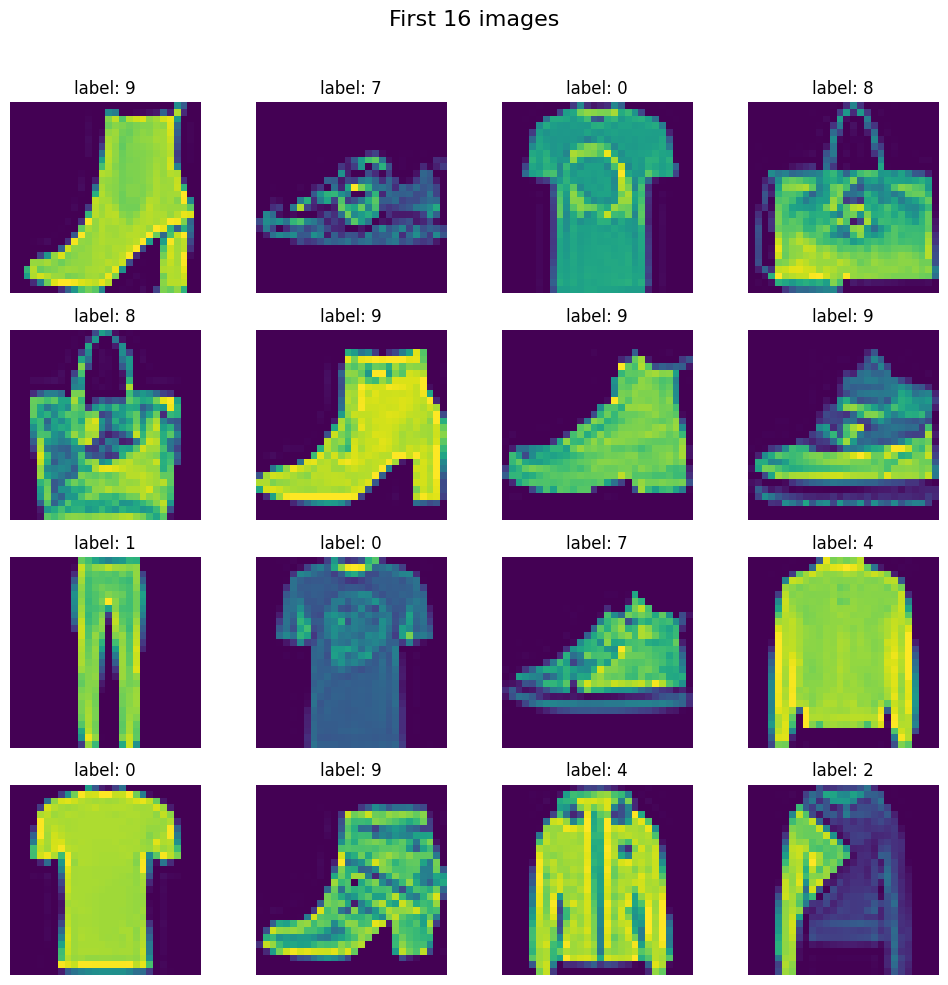

In [11]:
#creating a 4 x 4 grid of images
fig, axes= plt.subplots(4,4 ,figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)  #super title

#first 16 images
for i, ax in enumerate(axes.flat):  #converting 2D into 1D
  img=df.iloc[i,1:].values.reshape(28,28)  #column 0=label so better eliminating it
  ax.imshow(img)
  ax.axis('off')  #removing x-axis and y axis
  ax.set_title(f"label: {df.iloc[i,0]}")


plt.tight_layout(rect=[0,0,1,0.96])  #for preventing overlapping
plt.show()

In [12]:
#train test split
X=df.iloc[:,1:].values #EVERY COLUMN
y=df.iloc[:,0].values

In [13]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
#scaling features
X_train=X_train/255.0
X_test=X_test/255.0

In [15]:

X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [22]:
#creating CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features,labels):
    self.features=torch.tensor(features, dtype=torch.float32)
    self.labels=torch.tensor(labels, dtype=torch.long)


  def __len__(self):

    return len(self.features)

  def __getitem__(self,idx):

    return self.features[idx], self.labels[idx]


In [23]:
train_dataset=CustomDataset(X_train, y_train)
test_dataset=CustomDataset(X_test, y_test)

In [24]:
len(train_dataset)

4800

In [25]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [27]:
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False) #no shuffling as it'll cause problem in accuracy

In [28]:
#NN class

class NN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    #architecture
    self.model= nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
            )  #no need to explicity define sofmax


  def forward(self,x):

    return self.model(x)

In [29]:
epochs=100
learning_rate=0.1

In [31]:
#instantiating the model
model=NN(X_train.shape[1])

#loss fn
criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
len(train_loader)

150

In [37]:
#trainign
for epoch in range(epochs):

  total_epoch_loss=0

  for batch_features, batch_labels in train_loader:

        #forward pass
        out=model(batch_features)

        #loss calculation

        loss=criterion(out,batch_labels)

        #backpropagation
        optimizer.zero_grad() # clearing gradients
        loss.backward()


        #upate grads
        optimizer.step()

        #after every epoch , loss=

        total_epoch_loss = total_epoch_loss + loss.item()


  avg_loss=total_epoch_loss/len(train_loader)
  print(f"Epoch:{epoch+1}, loss:{avg_loss}")





Epoch:1, loss:1.319283241033554
Epoch:2, loss:0.7877565165360768
Epoch:3, loss:0.6648609952131908
Epoch:4, loss:0.5891861166556677
Epoch:5, loss:0.5581017426649729
Epoch:6, loss:0.5126523438096047
Epoch:7, loss:0.4786985170841217
Epoch:8, loss:0.4506889546414216
Epoch:9, loss:0.42562957922617595
Epoch:10, loss:0.40788682212432226
Epoch:11, loss:0.3893586025138696
Epoch:12, loss:0.3782104335228602
Epoch:13, loss:0.3499078239997228
Epoch:14, loss:0.3419437821706136
Epoch:15, loss:0.3328783572713534
Epoch:16, loss:0.31748702079057695
Epoch:17, loss:0.30777701425055665
Epoch:18, loss:0.2990879504879316
Epoch:19, loss:0.2897305560608705
Epoch:20, loss:0.27322961928943795
Epoch:21, loss:0.274045862108469
Epoch:22, loss:0.2585980135947466
Epoch:23, loss:0.24283487021923064
Epoch:24, loss:0.259720701922973
Epoch:25, loss:0.2308235917488734
Epoch:26, loss:0.23348285488784312
Epoch:27, loss:0.22721887749930222
Epoch:28, loss:0.20644574716687203
Epoch:29, loss:0.19257125015060106
Epoch:30, loss:0

In [38]:
# setting model to eval mode

model.eval()


NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [39]:
#evaluation

total=0
correct=0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

     out=model(batch_features)

     _, predicted = torch.max(out,1)

     total= total+ batch_labels.shape[0]

     correct= correct + ( predicted == batch_labels).sum().item()

print(correct/total)






0.8375


38